Import Necessary libraries

In [1]:
# Data Libs 
import numpy as np
import pandas as pd
from openpyxl import load_workbook
import os

# Regression Metrics
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regression Models Classes
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process.kernels import RBF

from keras.models import Sequential
from keras.layers import Dense

# Preprocessing lib
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Visual lib
import seaborn as sns
import matplotlib.pyplot as plt

List of Regression Models used

In [2]:
modelN1 = 'LinearRegression'
modelN2 = 'PolynommialRegression'
modelN3 = 'RandomForestRegression'
modelN4 = 'DecisionTreeRegression'
modelN5 = 'GaussianRegression'
modelN6 = 'SupportVectorRegression'
modelN7 = 'KNNRegression'
modelN8 = 'NeuralNetworkRegression'
modelN9 = 'RidgeRegression'
modelN10 = 'LassoRegression'
modelN11 = 'GradientBoostingRegression'
modelN12 = 'AdaBoostingRegression'

Model Initialization

In [3]:
class TheRegressor:
    def __init__(self,dataset,sheet_name) -> None:
        self.sheet_name = sheet_name
        self.X,self.y =  dataset.iloc[:,1:-1],dataset.iloc[:,-1]

        self.LinearR = LinearRegression()
        self.RFR = RandomForestRegressor(max_depth=2, random_state=0)
        self.DTR = DecisionTreeRegressor(random_state=0)

        kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
        self.GPR = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

        self.SVReg = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
        self.KNNR = KNeighborsRegressor(n_neighbors=2)

        self.NN = Sequential()
        self.NN.add(Dense(units=12, activation='relu'))
        # Second Hidden layer
        self.NN.add(Dense(units=8, activation='relu'))
        # Output layer
        self.NN.add(Dense(units=1, activation='linear'))
        self.NN.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse','mae'])

        self.RidgeR = Ridge(alpha=1.0)
        self.LassoR = Lasso(alpha=0.1)
        self.GBR = GradientBoostingRegressor(random_state=0)
        self.ABR = AdaBoostRegressor(random_state=0, n_estimators=100)

    def find_corr(self):
        self.corr = dataset.corr()
        plt.figure(figsize=(20,9))
        hm = sns.heatmap(self.corr,cmap='crest',annot=True,fmt='.2f')
        plt.savefig(self.sheet_name+'RegressionCorrelationHeatmap.png',bbox_inches="tight")

    def process_dataset(self,split_size = 0.3):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size = split_size, random_state = 1)
        self.X_test,self.y_test = X_test,y_test

        # Linear Prediction
        self.LinearR.fit(X_train,y_train)
        self.LinearR_y_pred = self.LinearR.predict(X_test)

        # Polynomial Prediction
        poly = PolynomialFeatures(degree=2, include_bias=False)
        polyX_train = poly.fit_transform(X_train)
        self.LinearR.fit(polyX_train, y_train)
        polyX_test = poly.fit_transform(X_test)
        self.poly_y_pred = self.LinearR.predict(polyX_test)

        # Random Forest Prediction
        self.RFR.fit(X_train,y_train)
        self.RFR_y_pred = self.RFR.predict(X_test)

        # Decision Tree Prediction
        self.DTR.fit(X_train,y_train)
        self.DTR_y_pred = self.DTR.predict(X_test)

        # Gaussian Process Prediction
        self.GPR.fit(X_train,y_train)
        self.GPR_y_pred = self.GPR.predict(X_test)

        # Support Vector Prediction
        self.SVReg.fit(X_train, y_train)
        self.SVReg_y_pred = self.SVReg.predict(X_test)

        # KNN Prediction
        self.KNNR.fit(X_train,y_train)
        self.KNNR_y_pred = self.KNNR.predict(X_test)

        # Neural Network Prediction
        self.NN.fit(X_train, y_train,epochs=50,batch_size=10,verbose=0)
        self.NN_y_pred = self.NN.predict(X_test)

        # Ridge Prediction
        self.RidgeR.fit(X_train,y_train)
        self.RidgeR_y_pred = self.RidgeR.predict(X_test)

        # Lasso Prediction
        self.LassoR.fit(X_train,y_train)
        self.Lasso_y_pred = self.LassoR.predict(X_test)

        # Gradient Boosting Prediction
        self.GBR.fit(X_train,y_train)
        self.GBR_y_pred = self.GBR.predict(X_test)

        # Ada Boost Prediction
        self.ABR.fit(X_train,y_train)
        self.ABR_y_pred = self.ABR.predict(X_test)

    def write_preds(self):
        predsheet = pd.DataFrame(self.X_test)
        predsheet["True "+self.sheet_name] = self.y_test
        predsheet[modelN1] = self.LinearR_y_pred
        predsheet[modelN2] = self.poly_y_pred
        predsheet[modelN3] = self.RFR_y_pred
        predsheet[modelN4] = self.DTR_y_pred
        predsheet[modelN5] = self.GPR_y_pred
        predsheet[modelN6] = self.SVReg_y_pred
        predsheet[modelN7] = self.KNNR_y_pred
        predsheet[modelN8] = self.NN_y_pred
        predsheet[modelN9] = self.RidgeR_y_pred
        predsheet[modelN10] = self.Lasso_y_pred
        predsheet[modelN11] = self.GBR_y_pred
        predsheet[modelN12] = self.ABR_y_pred
        return predsheet

Data Import

In [4]:
MH_datasheet = pd.read_excel("CompleteDataWorksheet.xlsx",sheet_name="MicroHardness")
SR_datasheet = pd.read_excel("CompleteDataWorksheet.xlsx",sheet_name="SurfaceRoughness")
TLD_datasheet = pd.read_excel("CompleteDataWorksheet.xlsx",sheet_name="ThicknessOfLayerDeposited")
dataset_dict = {"MicroHardness":MH_datasheet,"SurfaceRoughness":SR_datasheet,"ThicknessOfLayerDeposited":TLD_datasheet}

C:\Users\Bharg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Bharg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 94ms/step


C:\Users\Bharg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\Bharg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 50ms/step


C:\Users\Bharg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 51ms/step


C:\Users\Bharg\AppData\Local\Temp\ipykernel_23460\970773182.py:8: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


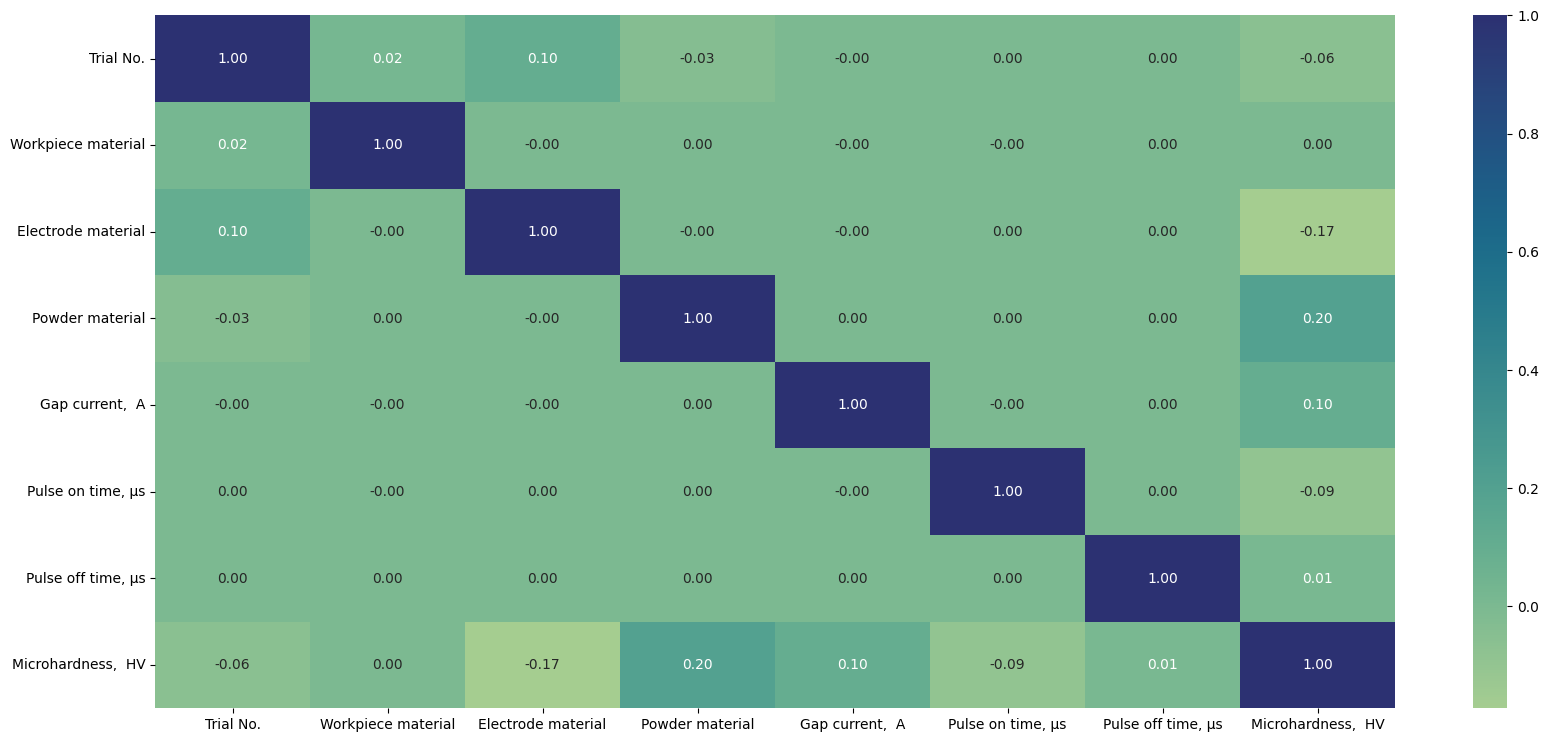

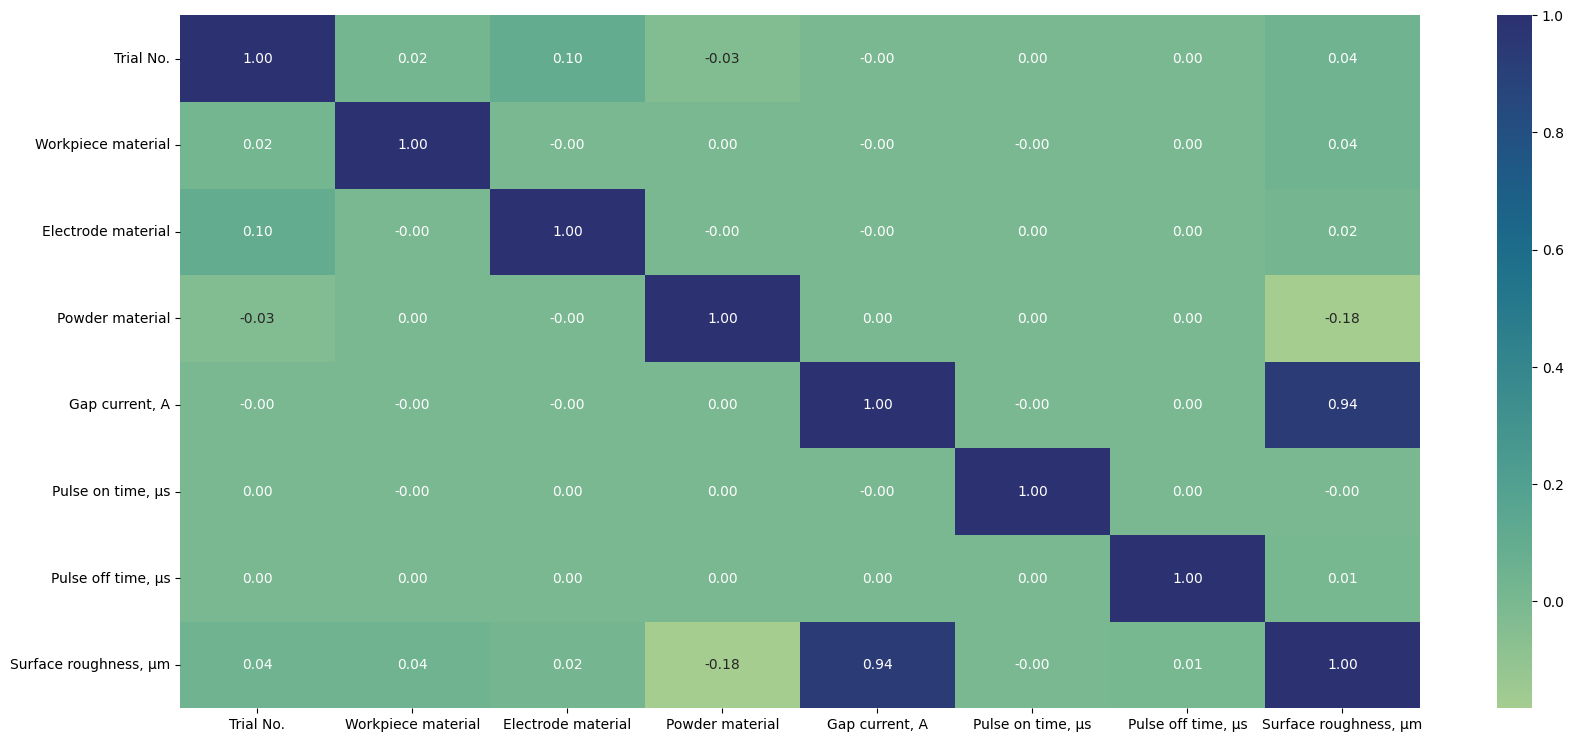

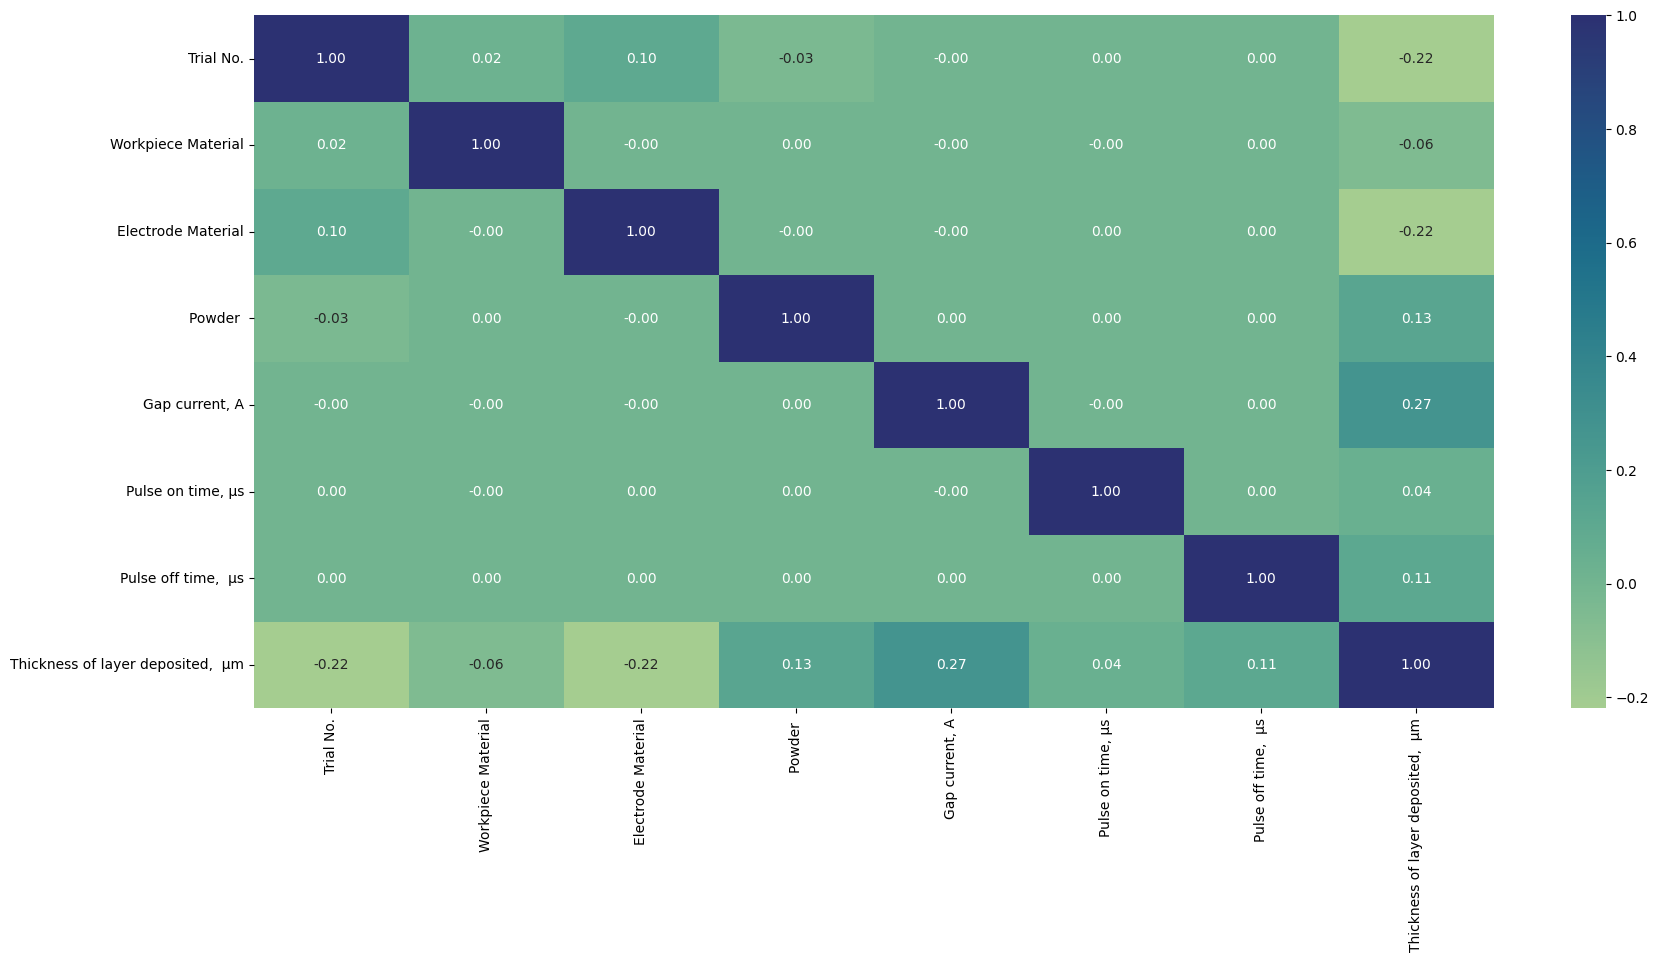

In [5]:
writer = pd.ExcelWriter('RegressionPredictionResults.xlsx', engine='openpyxl')    
for sheet_name, dataset in dataset_dict.items():
    reg = TheRegressor(dataset=dataset,sheet_name=sheet_name)
    reg.find_corr()
    reg.process_dataset(split_size=0.3)
    s = reg.write_preds()
    s.to_excel(writer,sheet_name=sheet_name)
writer.save()
writer.close()